# Head Pose Estimation CNN

## Installling packages to access google drive

In [1]:
# # Load the Drive helper and mount
# from google.colab import drive

# # This will prompt for authorization.
# drive.mount('/content/drive')

## Importing packages

In [67]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

print("Tensorflow version is: ", tf.__version__)
assert tf.__version__[0] == '2'

Tensorflow version is:  2.2.0


In [68]:
import pathlib
import shutil
import tempfile

from  IPython import display
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score

## Setting up Tensorboard

In [4]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Open an embedded TensorBoard viewer
%tensorboard --logdir {logdir}/models

## Loading the Dataset

In [69]:
train_csv = pd.read_csv("train_data.csv")

test_csv = pd.read_csv("test_data.csv")

In [6]:
!ls

Head-pose-estimation-cnn.ipynb s3731304_predictions.csv
README.md                      test_data.csv
dataset                        train_data.csv


In [70]:
train_csv.head(5)

,filename,person_id,series,tilt,pan
0,face_790.jpg,5,1,-15,30
1,face_2445.jpg,5,1,0,-75
2,face_2266.jpg,5,2,-15,-60
3,face_2713.jpg,5,2,0,-90
4,face_2016.jpg,5,2,15,-75


In [71]:
test_csv.head(5)

,filename,person_id,series
0,face_33.jpg,2,1
1,face_2148.jpg,2,2
2,face_2119.jpg,2,1
3,face_1262.jpg,2,1
4,face_516.jpg,2,2


In [9]:
train_dataframe = train_csv[['filename', 'tilt', 'pan']]
test_dataframe = test_csv[['filename']]

print(train_dataframe.shape, test_dataframe.shape)

(2325, 3) (465, 1)


## Creating dataframe with image data

In [72]:
training_data = []

def create_training_data():  
    count = 0
    for row in train_dataframe.iterrows():
      source = 'modified_data/'+ row[1]['filename']
      img_array = cv2.imread(source)
      tilt = row[1]['tilt']
      pan = row[1]['pan']
      training_data.append([img_array, tilt, pan])
      count += 1
      print("Total: ", count)

create_training_data()

Total:  1
Total:  2
Total:  3
Total:  4
Total:  5
Total:  6
Total:  7
Total:  8
Total:  9
Total:  10
Total:  11
Total:  12
Total:  13
Total:  14
Total:  15
Total:  16
Total:  17
Total:  18
Total:  19
Total:  20
Total:  21
Total:  22
Total:  23
Total:  24
Total:  25
Total:  26
Total:  27
Total:  28
Total:  29
Total:  30
Total:  31
Total:  32
Total:  33
Total:  34
Total:  35
Total:  36
Total:  37
Total:  38
Total:  39
Total:  40
Total:  41
Total:  42
Total:  43
Total:  44
Total:  45
Total:  46
Total:  47
Total:  48
Total:  49
Total:  50
Total:  51
Total:  52
Total:  53
Total:  54
Total:  55
Total:  56
Total:  57
Total:  58
Total:  59
Total:  60
Total:  61
Total:  62
Total:  63
Total:  64
Total:  65
Total:  66
Total:  67
Total:  68
Total:  69
Total:  70
Total:  71
Total:  72
Total:  73
Total:  74
Total:  75
Total:  76
Total:  77
Total:  78
Total:  79
Total:  80
Total:  81
Total:  82
Total:  83
Total:  84
Total:  85
Total:  86
Total:  87
Total:  88
Total:  89
Total:  90
Total:  91
Total:  

Total:  785
Total:  786
Total:  787
Total:  788
Total:  789
Total:  790
Total:  791
Total:  792
Total:  793
Total:  794
Total:  795
Total:  796
Total:  797
Total:  798
Total:  799
Total:  800
Total:  801
Total:  802
Total:  803
Total:  804
Total:  805
Total:  806
Total:  807
Total:  808
Total:  809
Total:  810
Total:  811
Total:  812
Total:  813
Total:  814
Total:  815
Total:  816
Total:  817
Total:  818
Total:  819
Total:  820
Total:  821
Total:  822
Total:  823
Total:  824
Total:  825
Total:  826
Total:  827
Total:  828
Total:  829
Total:  830
Total:  831
Total:  832
Total:  833
Total:  834
Total:  835
Total:  836
Total:  837
Total:  838
Total:  839
Total:  840
Total:  841
Total:  842
Total:  843
Total:  844
Total:  845
Total:  846
Total:  847
Total:  848
Total:  849
Total:  850
Total:  851
Total:  852
Total:  853
Total:  854
Total:  855
Total:  856
Total:  857
Total:  858
Total:  859
Total:  860
Total:  861
Total:  862
Total:  863
Total:  864
Total:  865
Total:  866
Total:  867
Tota

Total:  1433
Total:  1434
Total:  1435
Total:  1436
Total:  1437
Total:  1438
Total:  1439
Total:  1440
Total:  1441
Total:  1442
Total:  1443
Total:  1444
Total:  1445
Total:  1446
Total:  1447
Total:  1448
Total:  1449
Total:  1450
Total:  1451
Total:  1452
Total:  1453
Total:  1454
Total:  1455
Total:  1456
Total:  1457
Total:  1458
Total:  1459
Total:  1460
Total:  1461
Total:  1462
Total:  1463
Total:  1464
Total:  1465
Total:  1466
Total:  1467
Total:  1468
Total:  1469
Total:  1470
Total:  1471
Total:  1472
Total:  1473
Total:  1474
Total:  1475
Total:  1476
Total:  1477
Total:  1478
Total:  1479
Total:  1480
Total:  1481
Total:  1482
Total:  1483
Total:  1484
Total:  1485
Total:  1486
Total:  1487
Total:  1488
Total:  1489
Total:  1490
Total:  1491
Total:  1492
Total:  1493
Total:  1494
Total:  1495
Total:  1496
Total:  1497
Total:  1498
Total:  1499
Total:  1500
Total:  1501
Total:  1502
Total:  1503
Total:  1504
Total:  1505
Total:  1506
Total:  1507
Total:  1508
Total:  1509

Total:  2101
Total:  2102
Total:  2103
Total:  2104
Total:  2105
Total:  2106
Total:  2107
Total:  2108
Total:  2109
Total:  2110
Total:  2111
Total:  2112
Total:  2113
Total:  2114
Total:  2115
Total:  2116
Total:  2117
Total:  2118
Total:  2119
Total:  2120
Total:  2121
Total:  2122
Total:  2123
Total:  2124
Total:  2125
Total:  2126
Total:  2127
Total:  2128
Total:  2129
Total:  2130
Total:  2131
Total:  2132
Total:  2133
Total:  2134
Total:  2135
Total:  2136
Total:  2137
Total:  2138
Total:  2139
Total:  2140
Total:  2141
Total:  2142
Total:  2143
Total:  2144
Total:  2145
Total:  2146
Total:  2147
Total:  2148
Total:  2149
Total:  2150
Total:  2151
Total:  2152
Total:  2153
Total:  2154
Total:  2155
Total:  2156
Total:  2157
Total:  2158
Total:  2159
Total:  2160
Total:  2161
Total:  2162
Total:  2163
Total:  2164
Total:  2165
Total:  2166
Total:  2167
Total:  2168
Total:  2169
Total:  2170
Total:  2171
Total:  2172
Total:  2173
Total:  2174
Total:  2175
Total:  2176
Total:  2177

Total:  2799
Total:  2800
Total:  2801
Total:  2802
Total:  2803
Total:  2804
Total:  2805
Total:  2806
Total:  2807
Total:  2808
Total:  2809
Total:  2810
Total:  2811
Total:  2812
Total:  2813
Total:  2814
Total:  2815
Total:  2816
Total:  2817
Total:  2818
Total:  2819
Total:  2820
Total:  2821
Total:  2822
Total:  2823
Total:  2824
Total:  2825
Total:  2826
Total:  2827
Total:  2828
Total:  2829
Total:  2830
Total:  2831
Total:  2832
Total:  2833
Total:  2834
Total:  2835
Total:  2836
Total:  2837
Total:  2838
Total:  2839
Total:  2840
Total:  2841
Total:  2842
Total:  2843
Total:  2844
Total:  2845
Total:  2846
Total:  2847
Total:  2848
Total:  2849
Total:  2850
Total:  2851
Total:  2852
Total:  2853
Total:  2854
Total:  2855
Total:  2856
Total:  2857
Total:  2858
Total:  2859
Total:  2860
Total:  2861
Total:  2862
Total:  2863
Total:  2864
Total:  2865
Total:  2866
Total:  2867
Total:  2868
Total:  2869
Total:  2870
Total:  2871
Total:  2872
Total:  2873
Total:  2874
Total:  2875

 15    325
-15    325
 60    325
-60    325
 30    325
-30    325
 0     325
 90     25
-90     25
Name: tilt, dtype: int64
 0     225
 75    175
-75    175
 45    175
-45    175
 15    175
-15    175
 90    175
-90    175
 60    175
-60    175
 30    175
-30    175
Name: pan, dtype: int64


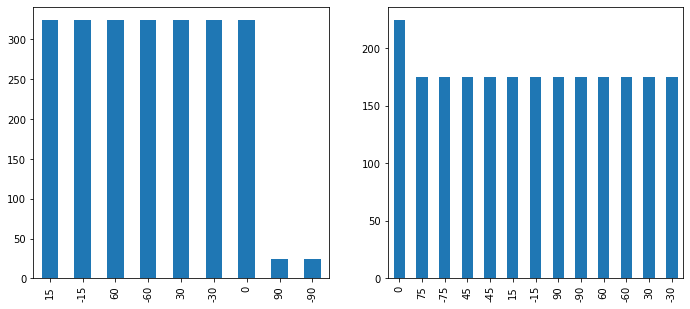

In [11]:
plt.figure(figsize=(18,5))

plt.subplot(131)
train_dataframe['tilt'].value_counts().plot(kind='bar')
print(train_dataframe['tilt'].value_counts())

plt.subplot(132)
train_dataframe['pan'].value_counts().plot(kind='bar')
print(train_dataframe['pan'].value_counts())

## 1) Up-Scaling Tilt's Label [90]

In [12]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = train_dataframe[train_dataframe.tilt!=90]
df_minority = train_dataframe[train_dataframe.tilt==90]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=325,    # to match majority class
                                 random_state=425) # reproducible results
 
# Combine majority class with upsampled minority class
train_dataframe = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
train_dataframe.tilt.value_counts()

 15    325
-15    325
 90    325
 60    325
-60    325
 30    325
-30    325
 0     325
-90     25
Name: tilt, dtype: int64

# 2) Up-Scaling Tilt's Label [-90]

In [13]:
# Separate majority and minority classes
df_majority = train_dataframe[train_dataframe.tilt!=-90]
df_minority = train_dataframe[train_dataframe.tilt==-90]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=325,    # to match majority class
                                 random_state=425) # reproducible results
 
# Combine majority class with upsampled minority class
train_dataframe = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
train_dataframe.tilt.value_counts()

 15    325
-15    325
 90    325
-90    325
 60    325
-60    325
 30    325
-30    325
 0     325
Name: tilt, dtype: int64

# Down Scaling Pan's Label [0]

In [14]:
# Separate majority and minority classes
df_majority = train_dataframe[train_dataframe.pan==0]
df_minority = train_dataframe[train_dataframe.pan!=0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=175,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.pan.value_counts()

 75    175
-75    175
 45    175
-45    175
 15    175
-15    175
 90    175
-90    175
 60    175
-60    175
 30    175
-30    175
 0     175
Name: pan, dtype: int64

 15    325
-15    325
 90    325
-90    325
 60    325
-60    325
 30    325
-30    325
 0     325
Name: tilt, dtype: int64
 75    175
-75    175
 45    175
-45    175
 15    175
-15    175
 90    175
-90    175
 60    175
-60    175
 30    175
-30    175
 0     175
Name: pan, dtype: int64


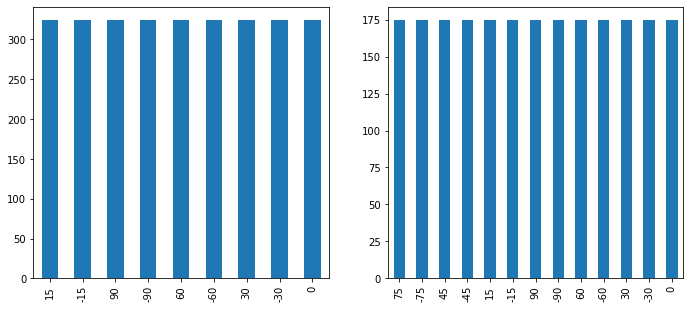

In [15]:
plt.figure(figsize=(18,5))

plt.subplot(131)
train_dataframe['tilt'].value_counts().plot(kind='bar')
print(train_dataframe['tilt'].value_counts())

plt.subplot(132)
df_downsampled['pan'].value_counts().plot(kind='bar')
print(df_downsampled['pan'].value_counts())

In [64]:
train_dataframe

,filename,tilt,pan
0,face_790.jpg,-15,30
1,face_2445.jpg,0,-75
2,face_2266.jpg,-15,-60
3,face_2713.jpg,0,-90
4,face_2016.jpg,15,-75
...,...,...,...
132,face_2192.jpg,-90,0
1812,face_1581.jpg,-90,0
2026,face_1698.jpg,-90,0
2026,face_1698.jpg,-90,0


In [17]:
training_data

[[array([[[ 23,  22,  24],
          [ 11,  10,  12],
          [111, 110, 112],
          ...,
          [166, 163, 165],
          [164, 161, 163],
          [162, 159, 161]],
  
         [[ 23,  22,  24],
          [ 11,  10,  12],
          [111, 110, 112],
          ...,
          [167, 164, 166],
          [164, 161, 163],
          [163, 160, 162]],
  
         [[ 23,  22,  24],
          [ 11,  10,  12],
          [111, 110, 112],
          ...,
          [168, 165, 167],
          [166, 163, 165],
          [164, 161, 163]],
  
         ...,
  
         [[ 21,  21,  21],
          [ 20,  20,  20],
          [ 35,  35,  35],
          ...,
          [145, 148, 146],
          [145, 148, 146],
          [145, 148, 146]],
  
         [[ 21,  21,  21],
          [ 20,  20,  20],
          [ 35,  35,  35],
          ...,
          [149, 153, 148],
          [149, 153, 148],
          [149, 153, 148]],
  
         [[ 22,  22,  22],
          [ 20,  20,  20],
          [ 34,  34,  34

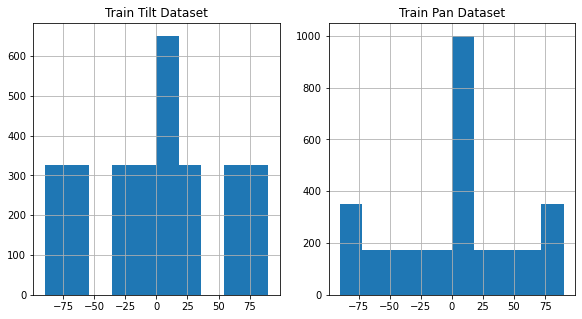

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.title("Train Tilt Dataset")
train_dataframe['tilt'].hist()

plt.subplot(132)
plt.title("Train Pan Dataset")
train_dataframe['pan'].hist()
plt.show()

In [43]:
import random

# Shuffling the data
random.shuffle(training_data)

X = []
y = []



for features, tilt, pan in training_data:
  X.append(features)
#   y.append([tilt, pan])
  y.append(tilt)
   

X = np.array(X)

y = np.array(y)

In [44]:
print(y)

[ 30 -30 -15 ...  30  60  60]


In [45]:
print(X.shape)

(2325, 144, 192, 3)


In [46]:
print(y.shape)

(2325,)


In [47]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shapes of featuresTrainX and labelTrainY: ", features_train.shape, labels_train.shape)
print("Shapes of featuresTestX and labelTestY: ", features_test.shape, labels_test.shape)

Shapes of featuresTrainX and labelTrainY:  (1860, 144, 192, 3) (1860,)
Shapes of featuresTestX and labelTestY:  (465, 144, 192, 3) (465,)


In [48]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [61]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
# 1st argument is number of feature dectectors=64
# 2nd argument is dimension of the feature map=(3,3)
# 3rd argument is input shape 28x28 and 1=grayscale
# 4th argument is the relu activation function to remove any negative pixel values
# from the feature maps in order to have non-linearity in the model
classifier.add(Conv2D(64, (3, 3), input_shape=features_train.shape[1:], activation = 'relu'))

# Step 2 - Pooling
# we are preserving the features(i.e. if the image is twisted or flipped it still preserves the pattern)
# introducing spatial invariants
# reducing the size by 75%
# reducing number of parameters
# Hence, preventing overfitting
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(1, activation='softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [63]:
history = classifier.fit(features_train, labels_train, batch_size=64, epochs=20, validation_data=(features_test, labels_test))
# classifier.save("classifier.h5")

Epoch 1/20


KeyboardInterrupt: 

In [65]:
import pickle

pickle_out = open("training_data.pickle", "wb")
pickle.dump(training_data, pickle_out)
pickle_out.close()

In [66]:
pickle_out = open("features.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("labels.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()